# HW0

**NAME :** SOMTO A.<br>
**HW # :** 0<br>
**REPO:** *https://github.com/Somto-Dera/ECGR5090-Machine-Learning*<br>

####  PROBLEM 1:  <br>
- Develop a code that run linear regression with gradient decent algorithm for each of the explanatory variables in isolation.
- In this case, you assume that in each iteration, only one explanatory variable (either X1, or X2, or X3) is explaining the output. Basically, you need to do three different training, one per each explanatory variable. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters to zero (theta to zero).
- Finally discuss your results.

####  PROBLEM 2:  <br>
- Run linear regression with gradient descent algorithm using all three explanatory variables.
- For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (theta to zero).
- Finally discuss your results.

### Steps :
- import necessary libraries.
- load D3.csv dataset.
- preprocess data
- create a cost function.
- create gradient descent function.
- *Problem 1*
    - call gradient descent function three time(x1,x2,x3) to get values for theta and cost history in relation to each explanatory variable.
    - plot a linear regression fit graph with training data (x and y variables), and linear regresion(x, x.theta). Do three times for x1, x2 and x3.
    - plot a convergence of gradient descent graph with cost history. Do three times for x1, x2 and x3.
    - test result with a random variable of x. Do three times for x1, x2 and x3.
- *Problem 2*
    - dataset preprocess.
    - plot a graph showing the effect of changing the learning rate in convergence of the gradient descent with cost history.
    - test result with specific values for variables of x.

________________________________________________________________________________________________________________

----------------------------------------------------------------------------------------------------------------

In [1]:
# import needed libraries
import numpy as np          # for array and matrics manipulation
import pandas as pd          # for data manipulation and analysis
import matplotlib.pyplot as plt          # for data visualisation

In [2]:
# load dataset
dataset = pd.read_csv('D3.csv')          # load dataset
dataset.head()          # output first 5 rows from the dataset

,x1,x2,x3,y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [3]:
X_1 = dataset.values[:, 0]          # get input values from first column
X_2 = dataset.values[:, 1]          # get input values from first column
X_3 = dataset.values[:, 2]          # get input values from first column
y = dataset.values[:, 3]          # get output values from second column
m = len(y)          # Number of training examples
print('Number of training examples: ', m)

Number of training examples:  100


Text(0.5, 1.0, 'SCATTER PLOT OF TRAINING DATA\nred is x1 | yellow is x2 | blue is x3')

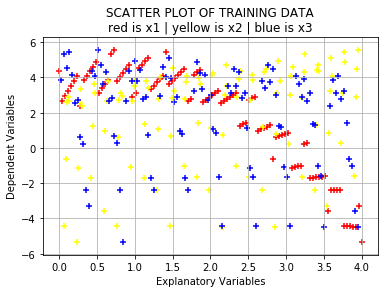

In [4]:
plt.scatter(X_1,y, color='red',marker= '+')
plt.scatter(X_2,y, color='yellow',marker= '+')
plt.scatter(X_3,y, color='blue',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel('Explanatory Variables')
plt.ylabel('Dependent Variables')
plt.title('SCATTER PLOT OF TRAINING DATA\nred is x1 | yellow is x2 | blue is x3')

In [5]:
# preprocess data
# matrix operations are much faster than loops operations, so matrice of x, θ and (x * θ) were used
#create a matrix with single column of ones
X_0 = np.ones((m, 1))

# use reshape function to convert Xs 1D array to 2D array of dimension 97x1
X_1 = X_1.reshape(m, 1)
X_2 = X_2.reshape(m, 1)
X_3 = X_3.reshape(m, 1)

# use hstack() function from numpy to stack X_0 and X_1,X_2 and X_3 horizontally (i.e. column wise) to make a single 2D array
# this will be our final X matrix (feature matrix)
x_1 = np.hstack((X_0, X_1))
x_2 = np.hstack((X_0, X_2))
x_3 = np.hstack((X_0, X_3))

#Initialise theta to zero as recommended by the hw question
theta = np.zeros(2)

----------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------

**Details on *comp_cost* function for the linear regression**.<br>

- the hypotheis function is h(θ,x)= θ_0 + θ_1 * x_1 + ... + θ_n * x_n

<br>**Input Parameters**
- *'X' :* 2D array where each row represent the training example and each column represent the feature ndarray
- *'y' :* 1D array of labels/target value for each traing example. dimension(1 x m)
- *'theta' :* 1D array of fitting parameters or weights. Dimension (1 x n)

<br>**Dimension(m x n)**
- *'m' :* number of training examples
- *'n' :* number of features (including X_0 column of ones)

<br>**Output Parameters**
- *'J' :* scalar value

<br>**Library Functions Used**
- *numpy.dot()* returns the product of two arrays
- *numpy.subtract()* performs vector entree subtraction
- *numpy.square()* performs the vector entree square

In [6]:
def comp_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    
    return J

**Details on *gradient_descent* function**
- a for loop i used to compute theta using batch gradient descent algorithm
- each value theta value is used to compute cost.Result is stored in a list
- cost should decrease with every iteration
- returns new theta and cost history variable

<br>**Input Parameters**
- *'X' :* 2D array where each row represent the training example and each column represent the feature ndarray
- *'y' :* 1D array of labels/target value for each traing example. dimension(1 x m)
- *'theta' :* 1D array of fitting parameters or weights. Dimension (1 x n)
- *'alpha' :* Learning rate. Scalar value
- *'iterations':* No of iterations. Scalar value. 

<br>**Dimension(m x n)**
- *'m' :* number of training examples
- *'n' :* number of features (including X_0 column of ones)

<br>**Output Parameters**
- *'theta' :*  Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
- *'cost_history' :* Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)

<br>**Library Functions Used**
- *numpy.dot()* returns the product of two arrays
- *numpy.subtract()* performs vector entree subtraction
- *numpy.transpose()* reverse or permute the axes of an array

In [7]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        
        cost_history[i] = comp_cost(X, y, theta)
        
    return theta, cost_history

In [8]:
# declare and assign values to the gradient descent learning parameters alpha and no of iterations
init_theta = [0., 0.];

#iterations = 800;
#alpha = 0.04;
iterations = 1000;
alpha = 0.01;

----------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------

### Problem 1

### 'X_1'

> **Call *gradient_descent* function for all 'Xs' value**
- *gradient_descent* function returns optimal theta and cost history.
- values are printed to screen

In [9]:
optimal_theta, cost_history = gradient_descent(x_1, y, init_theta, alpha, iterations)
print('Final value of theta with x1: ', optimal_theta)
print('First 5 values from cost_history: ', cost_history[:5])
print('Last 5 values from cost_history: ', cost_history[-5 :])

Final value of theta with x1:  [ 5.29294728 -1.79119079]
First 5 values from cost_history:  [5.48226715 5.44290965 5.40604087 5.37137434 5.33865767]
Last 5 values from cost_history:  [1.03735718 1.03712537 1.03689459 1.03666482 1.03643608]


> **Plot the *linear regression fit* for all 'Xs' value**
- the gradient descent function returns the optimal value of theta, this should give us the best fit line
- the green line is plotted using predicted values

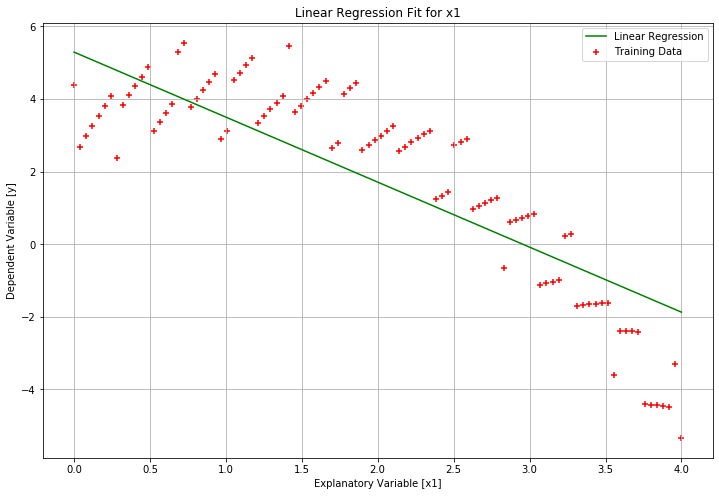

In [10]:
# Since X1 is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(x_1[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(x_1[:,1],x_1.dot(optimal_theta), color='green', label='Linear Regression')

plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.xlabel('Explanatory Variable [x1]')
plt.ylabel('Dependent Variable [y]')
plt.title('Linear Regression Fit for x1')
plt.legend()

> **Plot the *convergence of gradient descent for cost history* for all 'Xs' value**
- cost_history contains the values of cost for every iteration performed during batch gradient descent
- values of cost against no of iterations to visualize the performance of the 'Gradient Descent Algorithm' is plotted

Text(0.5, 1.0, 'Convergence of gradient descent for cost history of x1')

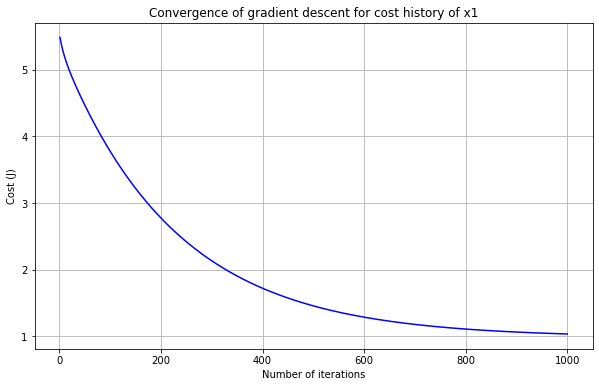

In [11]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for cost history of x1')

> **Test the linear model with a arbitrary value of x = 0.5**

In [12]:
prediction = np.array([1, 0.5]).dot(optimal_theta)
print('Using theta derived from the gradient decent function with input x1,\nwe can predict for a arbitratry variable of x = 0.5.')
print('\nPrediction of y for x_1 is: ', prediction)

Using theta derived from the gradient decent function with input x1,
we can predict for a arbitratry variable of x = 0.5.

Prediction of y for x_1 is:  4.397351887745785


----------------------------------------------------------------------------------------------------------------

### X_2

> **Call *gradient_descent* function for all 'Xs' value**
- *gradient_descent* function returns optimal theta and cost history.
- values are printed to screen

In [13]:
optimal_theta, cost_history = gradient_descent(x_2, y, init_theta, alpha, iterations)
print('Final value of theta with x2: ', optimal_theta)
print('First 5 values from cost_history: ', cost_history[:5])
print('Last 5 values from cost_history: ', cost_history[-5 :])

Final value of theta with x2:  [0.68701995 0.57669462]
First 5 values from cost_history:  [5.29831663 5.09909109 4.92356115 4.76890697 4.63264432]
Last 5 values from cost_history:  [3.59967832 3.59967694 3.59967556 3.59967419 3.59967283]


> **Plot the *linear regression fit* for all 'Xs' value**
- the gradient descent function returns the optimal value of theta, this should give us the best fit line
- the green line is plotted using predicted values

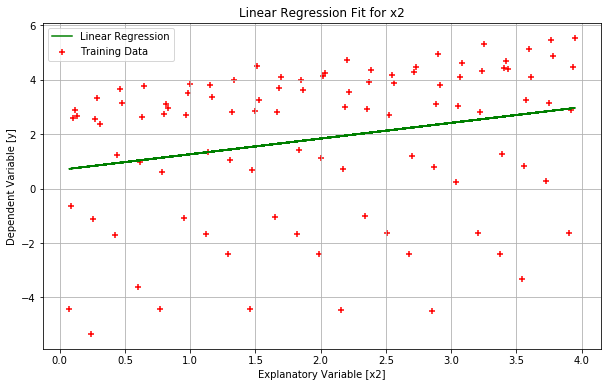

In [14]:
# Since X2 is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(x_2[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(x_2[:,1],x_2.dot(optimal_theta), color='green', label='Linear Regression')

plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.xlabel('Explanatory Variable [x2]')
plt.ylabel('Dependent Variable [y]')
plt.title('Linear Regression Fit for x2')
plt.legend()

> **Plot the *convergence of gradient descent for cost history* for all 'Xs' value**
- cost_history contains the values of cost for every iteration performed during batch gradient descent
- values of cost against no of iterations to visualize the performance of the 'Gradient Descent Algorithm' is plotted

Text(0.5, 1.0, 'Convergence of gradient descent for cost history of x2')

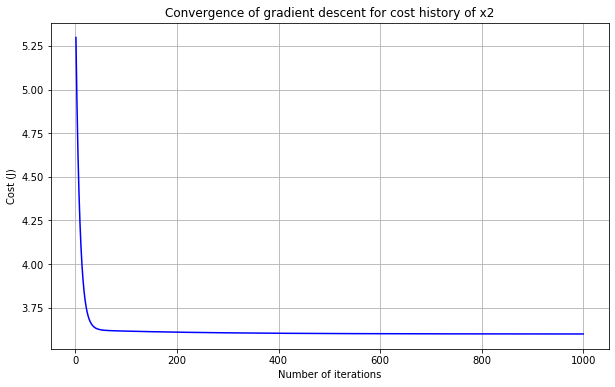

In [15]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for cost history of x2')

> **Test the linear model with a arbitrary value of x = 0.5**

In [16]:
prediction = np.array([1, 0.5]).dot(optimal_theta)
print('Using theta derived from the gradient decent function with input x2,\nwe can predict for a arbitratry variable of x = 0.5.')
print('\nPrediction of y for x_2 is: ', prediction)

Using theta derived from the gradient decent function with input x2,
we can predict for a arbitratry variable of x = 0.5.

Prediction of y for x_2 is:  0.9753672579275247


----------------------------------------------------------------------------------------------------------------

### X_3

> **Call *gradient_descent* function for all 'Xs' value**
- *gradient_descent* function returns optimal theta and cost history
- values are printed to screen

In [17]:
optimal_theta, cost_history = gradient_descent(x_3, y, init_theta, alpha, iterations)
print('Final value of theta with x3 =', optimal_theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :])

Final value of theta with x3 = [ 2.59118664 -0.40965135]
First 5 values from cost_history = [5.40768785 5.30397076 5.21178297 5.12979411 5.05682752]
Last 5 values from cost_history = [3.6398457  3.63979902 3.63975254 3.63970627 3.63966021]


> **Plot the *linear regression fit* for all 'Xs'**
- the gradient descent function returns the optimal value of theta, this should give us the best fit line
- the green line is plotted using predicted values

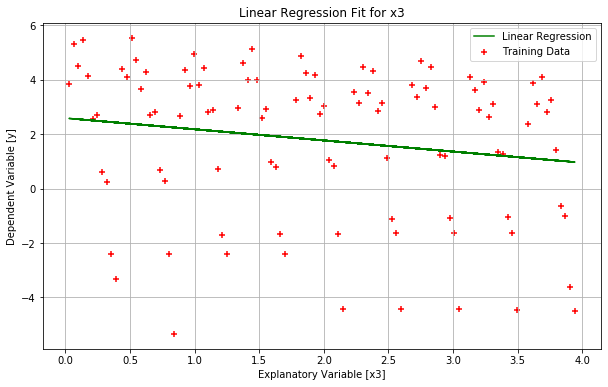

In [18]:
# Since X3 is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(x_3[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(x_3[:,1],x_3.dot(optimal_theta), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Explanatory Variable [x3]')
plt.ylabel('Dependent Variable [y]')
plt.title('Linear Regression Fit for x3')
plt.legend()

> **Plot the *convergence of gradient descent for cost history* for all 'Xs'**
- cost_history contains the values of cost for every iteration performed during batch gradient descent
- values of cost against no of iterations to visualize the performance of the 'Gradient Descent Algorithm' is plotted

Text(0.5, 1.0, 'Convergence of gradient descent for cost history of x3')

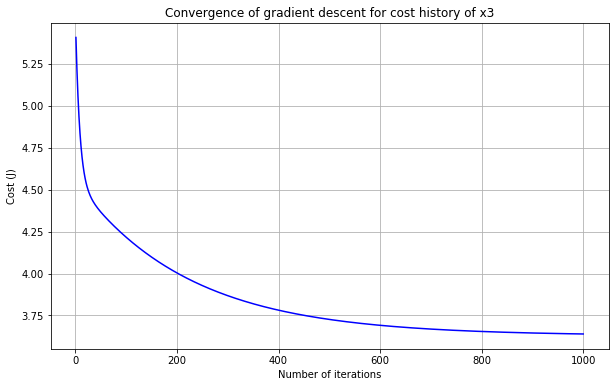

In [19]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for cost history of x3')

> **Test the linear model with a arbitrary value of x = 0.5**

In [20]:
prediction = np.array([1, 0.5]).dot(optimal_theta)
print('Using theta derived from the gradient decent function with input x3,\nwe can predict for a arbitratry variable of x = 0.5.')
print('\nPrediction of y for x_3 is: ', prediction)

Using theta derived from the gradient decent function with input x3,
we can predict for a arbitratry variable of x = 0.5.

Prediction of y for x_3 is:  2.3863609643654233


----------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------

### Problem 2

> **data preprocessing**

In [21]:
# load data to variable 'X'
X = dataset.values[:, 0:3]  # get input values from first-three columns

# hstack() function from numpy is used to add a column of ones to X feature 
# This will be our final X matrix (feature matrix)
x = np.hstack((np.ones((m,1)), X))

> **Plot the graph showing the effect of different learning rates on the Convergence of gradient descent**

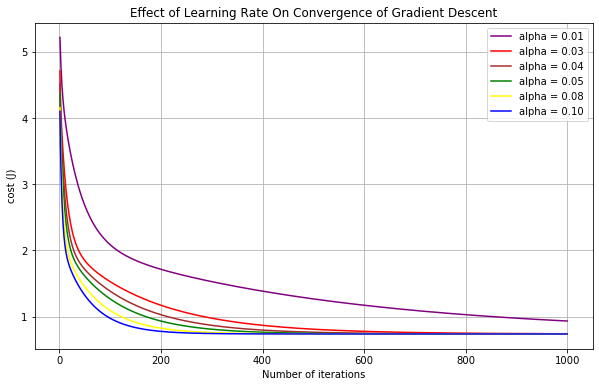

In [22]:
# Initialise theta to zero as recommended by the hw question
init_theta = np.zeros(4)

# declare and assign values to the gradient descent learning parameters alpha and no of iterations
#iterations = 800;
#alpha = 0.04;

iterations = 1000          # number of iterations
alpha_list = [0.01, 0.03, 0.04, 0.05, 0.07, 0.09]          # list of alpha variables to use
label_list = ['alpha = 0.01', 'alpha = 0.03',  'alpha = 0.04', 'alpha = 0.05', 'alpha = 0.08', 'alpha = 0.10']
color = ['purple', 'red', 'brown', 'green', 'yellow', 'blue']
i = 0          # alpha list index counter

for alpha in alpha_list:
    
    optimal_theta, cost_history = gradient_descent(x, y, init_theta, alpha, iterations)
    
    plt.plot(range(1, iterations +1), cost_history, color[i], label= label_list[i])
    
    plt.rcParams["figure.figsize"] = (10,6)
    plt.grid()
    plt.xlabel("Number of iterations")
    plt.ylabel("cost (J)")
    plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
    plt.legend()
    i += 1
    
plt.grid()

> **Call *gradient_descent* function for all 'Xs' value**
- *gradient_descent* function returns optimal theta and cost history
- values are printed to screen

In [23]:
#
optimal_alpha = 0.04

optimal_theta, cost_history = gradient_descent(x, y, init_theta, optimal_alpha, iterations)

print('Final value of theta =', optimal_theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :])

Final value of theta = [ 5.21863739 -1.99022411  0.54834904 -0.25159914]
First 5 values from cost_history = [4.51455638 4.13668881 3.89647561 3.69896902 3.52454515]
Last 5 values from cost_history = [0.73896615 0.73896216 0.73895819 0.73895426 0.73895036]


> **test the prediction capabilities of the model**
- check the predicted values using the theta value gotten from the gradient descent algorithm and specific x values.

In [24]:
#
x_list = [[1, 1, 1, 1], [1, 2, 0, 4], [1, 3, 2, 1]]

for x_variable in x_list:
    prediction = np.array(x_variable).dot(optimal_theta)
    print('\nUsing theta derived from the gradient decent function,\nwe can predict for "x", variable of x = '+str(x_variable)+'; our prediction of y is: ', prediction)


Using theta derived from the gradient decent function,
we can predict for "x", variable of x = [1, 1, 1, 1]; our prediction of y is:  3.5251631845177074

Using theta derived from the gradient decent function,
we can predict for "x", variable of x = [1, 2, 0, 4]; our prediction of y is:  0.23179261410386265

Using theta derived from the gradient decent function,
we can predict for "x", variable of x = [1, 3, 2, 1]; our prediction of y is:  0.09306401330394026
